I will try to evaluate some equations of state that were previously calculated analytically into numerical ones so that they can be calculated for more general systems.

# Equations of state
After evaluating the expected value (not written here), the field equation of motion is obtained;
\begin{align}
\phi_0 &= \frac{g_s}{m^2_s} \langle \bar{\psi} \psi \rangle = \frac{g_s}{m^2_s} \frac{\gamma}{2\pi^2} \int^{k_F}_0 dk \frac{k^2m^*}{\sqrt{k^2+m^{*2}}} \\
V_0 &= \frac{g_v}{m^2_\omega} \langle \psi^\dagger \psi \rangle = \frac{g_v}{m^2_\omega} \rho
\end{align}
where $\gamma$ is the nucleon spin degeneracy of the state.

Using effective mass $m*$ equation,
\begin{equation}
m^*=M-\frac{g^2_s}{m^2_s}\frac{\gamma}{2\pi^2} \int^{k_F}_0 dk \frac{k^2m^*}{\sqrt{k^2+m^{*2}}}
\end{equation}
and using spherical symmetry, the energy density and pressure can be written as
\begin{align}
\epsilon&=\frac{1}{2}m^2_s\phi^2_0+\frac{1}{2} m^2_\omega V^2_0 + \frac{\gamma}{2\pi^2} \int^{k_f}_0 dk k^2 \sqrt{k^2+m^{*2}}\\
P &= - \frac{1}{2}m^2_s\phi^2_0+\frac{1}{2} m^2_\omega V^2_0 + \frac{1}{3} (\frac{\gamma}{2\pi^2} \int^{k_f}_0 dk \frac{k^4}{\sqrt{k^2+m^{*2}}})
\end{align}

From the equations of state above, there are 3 types of integrals that can be solved analytically in Appendix B of Diener's thesis (2008).

# Calculating the effective mass integral or phi meson

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import numpy.polynomial.legendre as geek
import math

In [ ]:
# Meson integran function
def fungmeson(k, Meff):
    return k ** 2 * Meff / np.sqrt(k ** 2 + Meff ** 2)

In [ ]:
# numerical quadrature function
def kuad_meson(a,b,Meff):
    n = 20
    x,w = geek.leggauss(n)
    sum = 0.0
    for i in range(n):
      y = (b-a)*x[i]/2.0 + (b+a)/2.0
      sum += w[i] * fungmeson(y,Meff)
    kuad = (b-a) * sum/2.0
    return kuad

In [ ]:
gamma_list=[2,4]
hc = 197.3269804
M=939
kf_list = [x/100 for x in range(1,601)] # kf from 0 to 6

# Calculating integral based on variation of kf value
Integ_list = [] # List to store gaussian quadrature numerical results
Integ_list_sw = [] # List to store serot-walecka numerical results
Integ_list_a = [] # List to store corrected analytic results

# numerik gaussian quadrature
for kf in kf_list:
  kf_scaled = hc * kf
  integ = kuad_meson(0, kf_scaled, M)
  Integ_list.append(integ)

# analitik serot-walecka
for kf in kf_list:
  kf_scaled = hc * kf
  efef = (kf_scaled**2 + M**2)**0.5
  integ_sw = kf_scaled * efef - M**2 * np.log((kf_scaled + efef) / M)
  Integ_list_sw.append(integ_sw)

# analitik dikoreksi
for kf in kf_list:
  kf_scaled = hc * kf
  efef = (kf_scaled**2 + M**2)**0.5
  integ_a = M/2 *(kf_scaled * efef - M**2 * np.log((kf_scaled + efef) / M))
  Integ_list_a.append(integ_a)

# Ensure that all lists have the same length as kf_list
assert len(Integ_list) == len(kf_list)
assert len(Integ_list_a) == len(kf_list)

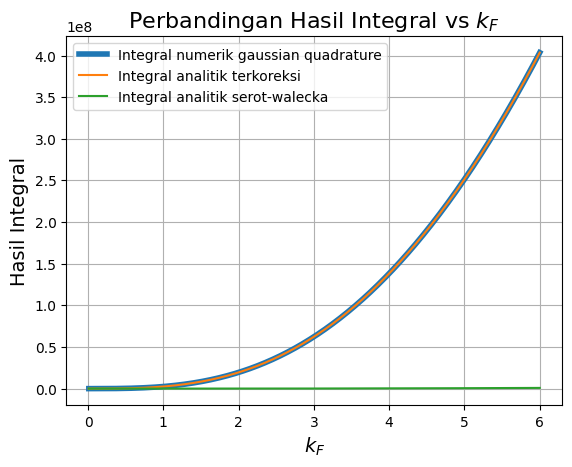

In [ ]:
# Plot
#plt.figure(figsize=(8, 6))
plt.plot(kf_list, Integ_list, label='Integral numerik gaussian quadrature', linewidth=4)
plt.plot(kf_list, Integ_list_a, label='Integral analitik terkoreksi')
plt.plot(kf_list, Integ_list_sw, label='Integral analitik serot-walecka')
plt.xlabel(r'$k_F$', fontsize=14)
plt.ylabel(r'Hasil Integral', fontsize=14)
plt.title('Perbandingan Hasil Integral vs $k_F$', fontsize=16)
plt.legend(loc='best')
plt.grid(True)
plt.show()

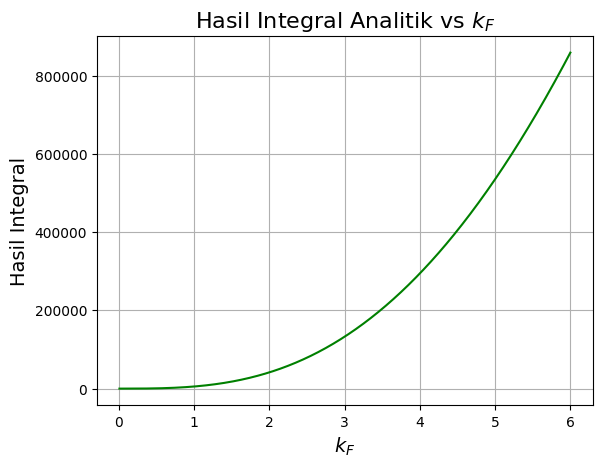

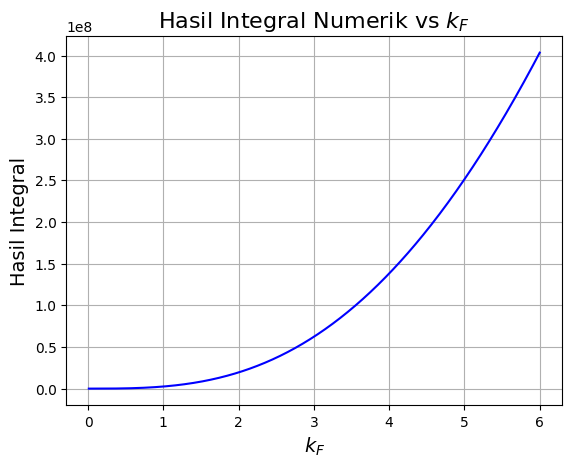

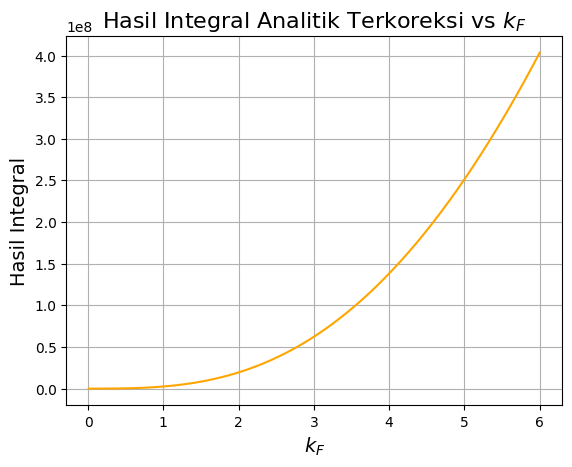

In [ ]:
plt.plot(kf_list, Integ_list_sw, color='green')
plt.xlabel(r'$k_F$', fontsize=14)
plt.ylabel(r'Hasil Integral', fontsize=14)
plt.title('Hasil Integral Analitik vs $k_F$', fontsize=16)
# plt.legend(loc='best')
plt.grid(True)
plt.show()

plt.plot(kf_list, Integ_list, color='blue')
plt.xlabel(r'$k_F$', fontsize=14)
plt.ylabel(r'Hasil Integral', fontsize=14)
plt.title('Hasil Integral Numerik vs $k_F$', fontsize=16)
# plt.legend(loc='best')
plt.grid(True)
plt.show()

plt.plot(kf_list, Integ_list_a, color='orange')
plt.xlabel(r'$k_F$', fontsize=14)
plt.ylabel(r'Hasil Integral', fontsize=14)
plt.title('Hasil Integral Analitik Terkoreksi vs $k_F$', fontsize=16)
# plt.legend(loc='best')
plt.grid(True)
plt.show()

# Calculating Effective Mass (Numerical)
$$\int^{k_F}_0 dk \frac{k^2m^*}{\sqrt{k^2+m^{*2}}} $$

In [ ]:
# Using another QHD-I Parameter Set (L1)
gamma_list = [2,4]
hc = 197.3269804
pi = math.pi
M = 939
M2 = M**2
ms = 550
mv = 782
cs2 = 267.1   # cs^2 = gs^2 * (M/ms)^2
cv2 = 195.9
ms2 = ms**2
mv2 = mv**2
gs2 = cs2*ms2/M2
gv2 = cv2*mv2/M2
gs = gs2**0.5

In [ ]:
# Secant Method
def secant(f, x0):
    flag = 1
    h = 0.01
    x1 = x0
    f1 = f(x1)
    x2 = x1 + x1*h
    f2 = f(x2)
    for i in range(1000):
        x = x2 - f2*(x2-x1)/(f2-f1)
        if abs(x-x2)<0.001:
            flag = 0
            break
        x1 = x2
        if(x<0):
            x = 0.1
        x2 = x
        f1 = f(x1)
        f2 = f(x2)
    if abs(flag-1)<0.001:
        print('No Convergence')
        x = 0
    return x

In [ ]:
kf_list = [x / 100 for x in range(1, 601)]

# Numerical integral list
Meff_list = []
E_list = []
logE_list = []
BE_list = []
P_list = []
logP_list = []
phi_list = []
# Analytical integral list
Meff_list_a = []
E_list_a = []
logE_list_a = []
BE_list_a = []
P_list_a = []
logP_list_a = []
phi_list_a = []
# Modified Analytical integral list
Meff_list_at = []
E_list_at = []
logE_list_at = []
BE_list_at = []
P_list_at = []
logP_list_at = []

# Define effective mass fuction
def f(x, kf, gamma): #numerical
    integral_val = kuad_meson(0, kf, x)  # Using x as Meff
    s = x - M + (cs2 * gamma * x / (4.0 * np.pi ** 2 * M2)) * integral_val
    return s
def fa(x): #analytic
    efef=(kf**2+x**2)**0.5
    s = x - M + gs2*gamma*x/(4.0*pi**2*ms**2)*(kf*efef-x**2*np.log((kf+efef)/x))
    return s
def fat(x): #modified analytic
    efef=(kf**2+x**2)**0.5
    s = x - M + gs2*gamma*x**2/(8.0*pi**2*ms**2)*(kf*efef-x**2*np.log((kf+efef)/x))
    return s

# Calculating each variable for numerical evaluation
for gamma in gamma_list:
    # New list for numerical integral
    Meff_list.append([])
    E_list.append([])
    logE_list.append([])
    BE_list.append([])
    P_list.append([])
    logP_list.append([])
    phi_list.append([])

    for kf in kf_list:
        kf_scaled = hc * kf
        rhoB = gamma * (kf_scaled**3) / (6 * (pi**2))
        # Secant method for calculating Meff
        Meff0 = M  # Initialization
        Meff = secant(lambda x: f(x, kf_scaled, gamma), Meff0)
        if abs(Meff - 0) < 0.001 or Meff < 0:
            Meff = Meff0
        Meff_list[-1].append(Meff / M)  # Append on loop kf

        # efef definition
        efef = (kf_scaled**2 + Meff**2)**0.5

        # Calculate E and P with defined efef
        E = cv2 * (rhoB**2) / (2 * (M**2)) + (M**2) * ((M - Meff)**2) / (2 * cs2) \
            + gamma * (kf_scaled * efef * (kf_scaled**2 + efef**2) - (Meff**4) * np.log((kf_scaled + efef) / Meff)) / ((4 * pi)**2)

        P = cv2 * (rhoB**2) / (2 * (M**2)) - (M**2) * ((M - Meff)**2) / (2 * cs2) \
            + gamma * (kf_scaled * efef * (2 * kf_scaled**2 - 3 * Meff**2) + 3 * (Meff**4) * np.log((kf_scaled + efef) / Meff)) / (3 * (4 * pi)**2)

        phi = (cs2 * gamma * Meff / (4.0 * np.pi ** 2 * M2)) * kuad_meson(0, kf, Meff)

        phi_list[-1].append(phi)
        E_list[-1].append(E / (hc**3))
        BE_list[-1].append(E / rhoB - M)
        P_list[-1].append(P / (hc**3))

        if (P>0):
           logE_list[-1].append(np.log10(E*1.782661921e12/(hc**3)))
           logP_list[-1].append(np.log10(P*1.602176634e33/(hc**3)))

#  Analytics evaluation
for gamma in gamma_list:
    # New list
    Meff_list_a.append([])
    E_list_a.append([])
    logE_list_a.append([])
    BE_list_a.append([])
    P_list_a.append([])
    logP_list_a.append([])
    phi_list_a.append([])

    for kf in kf_list:
        kf = hc*kf
        rhoB = gamma*(kf**3)/(6*(pi**2))
        Meff0 = M
        Meff = secant(fa, Meff0)

        if abs(Meff-0)<0.001 or Meff<0:
            Meff = Meff0
        Meff_list_a[-1].append(Meff/M)
        efef=(kf**2+Meff**2)**0.5

        E=cv2*(rhoB**2)/(2*(M**2)) + (M**2)*((M-Meff)**2)/(2*cs2)+gamma*(kf*efef*(kf**2+efef**2)-(Meff**4)*np.log((kf+efef)/Meff))/((4*pi)**2)
        P=cv2*(rhoB**2)/(2*(M**2)) - (M**2)*((M-Meff)**2)/(2*cs2)+gamma*(kf*efef*(2*kf**2-3*Meff**2)+3*(Meff**4)*np.log((kf+efef)/Meff))/(3*(4*pi)**2)
        phi = gs2*gamma*Meff/(4.0*pi**2*ms**2)*(kf*efef-Meff**2*np.log((kf+efef)/Meff))

        phi_list_a[-1].append(phi)
        E_list_a[-1].append(E/(hc**3))
        BE_list_a[-1].append(E/rhoB - M)
        P_list_a[-1].append(P/(hc**3))

        if (P>0):
           logE_list_a[-1].append(np.log10(E*1.782661921e12/(hc**3)))
           logP_list_a[-1].append(np.log10(P*1.602176634e33/(hc**3)))

#  Modified Analytics Evaluation
for gamma in gamma_list:
    # New list
    Meff_list_at.append([])
    E_list_at.append([])
    logE_list_at.append([])
    BE_list_at.append([])
    P_list_at.append([])
    logP_list_at.append([])

    for kf in kf_list:
        kf = hc*kf
        rhoB = gamma*(kf**3)/(6*(pi**2))
        Meff0 = M
        Meff = secant(fat, Meff0)

        if abs(Meff-0)<0.001 or Meff<0:
            Meff = Meff0
        Meff_list_at[-1].append(Meff/M)
        efef=(kf**2+Meff**2)**0.5

        E=cv2*(rhoB**2)/(2*(M**2)) + (M**2)*((M-Meff)**2)/(2*cs2)+gamma*(kf*efef*(kf**2+efef**2)-(Meff**4)*np.log((kf+efef)/Meff))/((4*pi)**2)
        P=cv2*(rhoB**2)/(2*(M**2)) - (M**2)*((M-Meff)**2)/(2*cs2)+gamma*(kf*efef*(2*kf**2-3*Meff**2)+3*(Meff**4)*np.log((kf+efef)/Meff))/(3*(4*pi)**2)
        phi = gs2*gamma*Meff/(4.0*pi**2*ms**2)*(kf*efef-Meff**2*np.log((kf+efef)/Meff))

        E_list_at[-1].append(E/(hc**3))
        BE_list_at[-1].append(E/rhoB - M)
        P_list_at[-1].append(P/(hc**3))

        if (P>0):
           logE_list_at[-1].append(np.log10(E*1.782661921e12/(hc**3)))
           logP_list_at[-1].append(np.log10(P*1.602176634e33/(hc**3)))

In [ ]:
x=0
kf=1.42
gamma=2
mm=f(x, kf, gamma)/M
print(f(x, kf, gamma))

-939.0


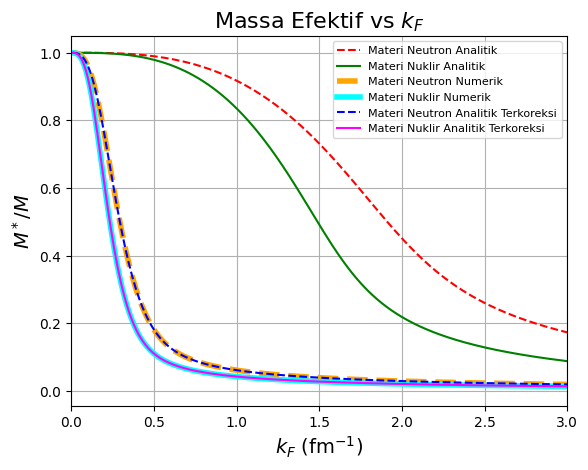

In [ ]:
# Effective mass Plot
# plt.figure(figsize=(8, 6))
plt.plot(kf_list, Meff_list_a[0], label='Materi Neutron Analitik', linestyle='--', color='red')
plt.plot(kf_list, Meff_list_a[1], label='Materi Nuklir Analitik', linestyle='-', color='green')
plt.plot(kf_list, Meff_list[0], label='Materi Neutron Numerik', linestyle='--', linewidth=4, color='orange')
plt.plot(kf_list, Meff_list[1], label='Materi Nuklir Numerik', linestyle='-', linewidth=4, color='cyan')
plt.plot(kf_list, Meff_list_at[0], label='Materi Neutron Analitik Terkoreksi', linestyle='--', color='blue')
plt.plot(kf_list, Meff_list_at[1], label='Materi Nuklir Analitik Terkoreksi', linestyle='-', color='magenta')
plt.xlabel(r'$k_F$ (fm$^{-1}$)', fontsize=14)
plt.ylabel(r'$M^*/M$', fontsize=14)
plt.title('Massa Efektif vs $k_F$', fontsize=16)
plt.xlim(0, 3)
plt.legend(loc='best')
plt.legend(fontsize=8)
plt.grid(True)
plt.show()

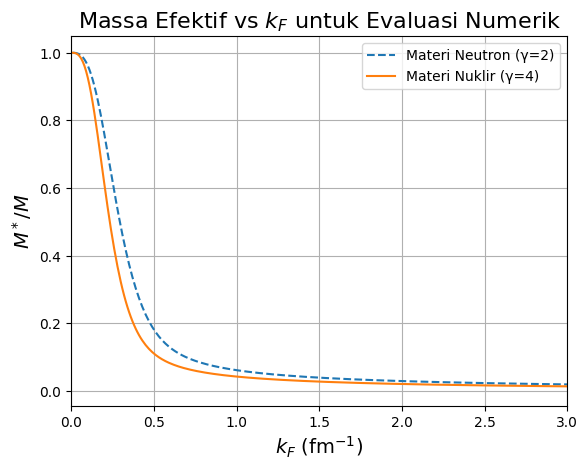

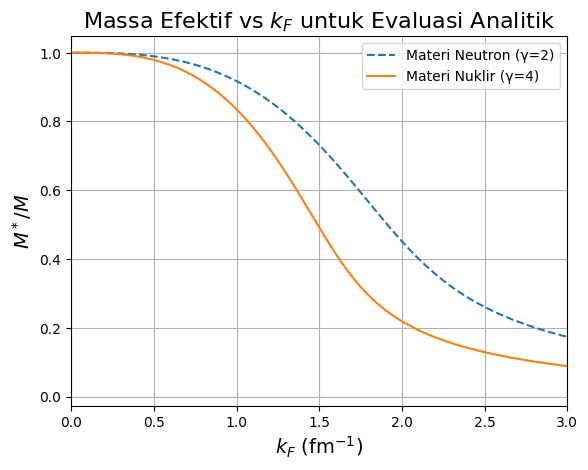

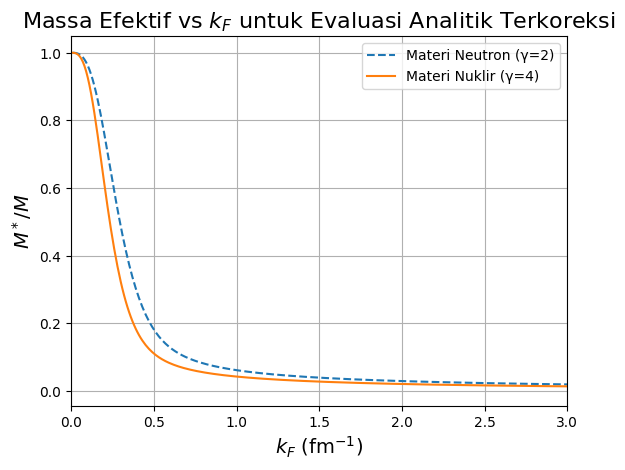

In [ ]:
# Numerical effective mass
plt.plot(kf_list, Meff_list[0], label='Materi Neutron (γ=2)', linestyle='--')
plt.plot(kf_list, Meff_list[1], label='Materi Nuklir (γ=4)', linestyle='-')
plt.xlabel(r'$k_F$ (fm$^{-1}$)', fontsize=14)
plt.ylabel(r'$M^*/M$', fontsize=14)
plt.title('Massa Efektif vs $k_F$ untuk Evaluasi Numerik', fontsize=16)
plt.xlim(0, 3)
plt.legend(loc='best')
plt.grid(True)
plt.show()

# Analytical effective mass
plt.plot(kf_list, Meff_list_a[0], label='Materi Neutron (γ=2)', linestyle='--')
plt.plot(kf_list, Meff_list_a[1], label='Materi Nuklir (γ=4)', linestyle='-')
plt.xlabel(r'$k_F$ (fm$^{-1}$)', fontsize=14)
plt.ylabel(r'$M^*/M$', fontsize=14)
plt.title('Massa Efektif vs $k_F$ untuk Evaluasi Analitik', fontsize=16)
plt.xlim(0, 3)
plt.legend(loc='best')
plt.grid(True)
plt.show()

# Modified Analytical effective mass
plt.plot(kf_list, Meff_list_at[0], label='Materi Neutron (γ=2)', linestyle='--')
plt.plot(kf_list, Meff_list_at[1], label='Materi Nuklir (γ=4)', linestyle='-')
plt.xlabel(r'$k_F$ (fm$^{-1}$)', fontsize=14)
plt.ylabel(r'$M^*/M$', fontsize=14)
plt.title('Massa Efektif vs $k_F$ untuk Evaluasi Analitik Terkoreksi', fontsize=16)
plt.xlim(0, 3)
plt.legend(loc='best')
plt.grid(True)
plt.show()

# Saturation Curve Plot

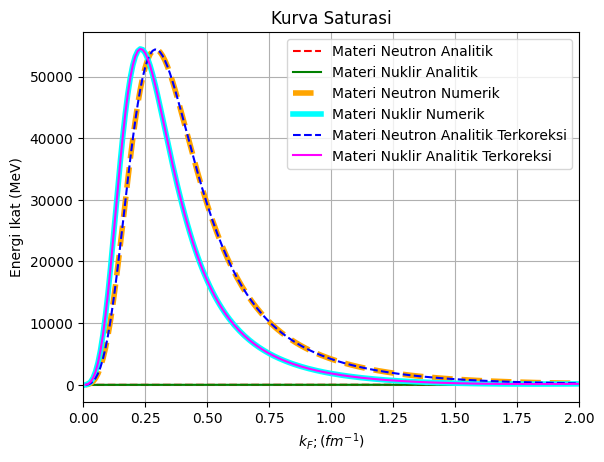

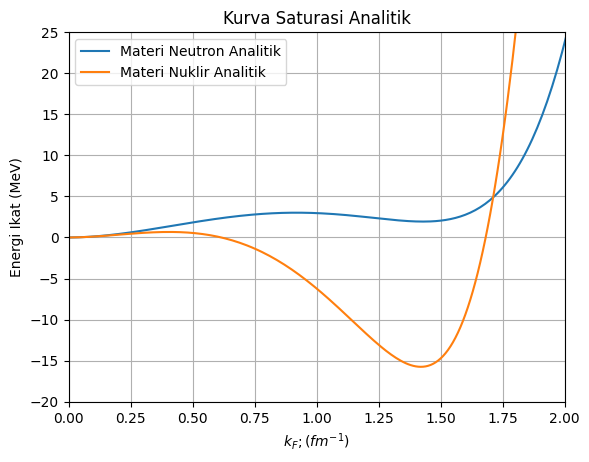

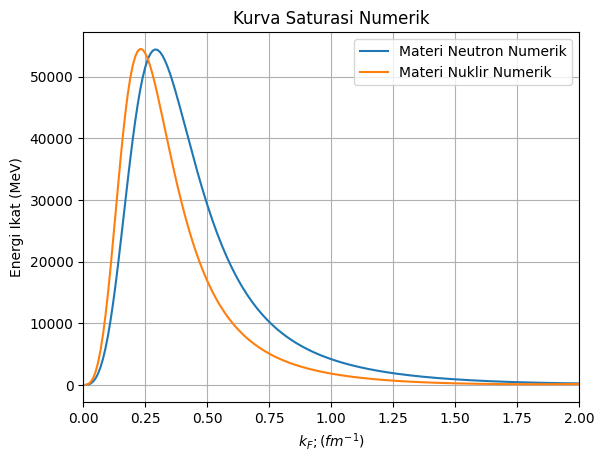

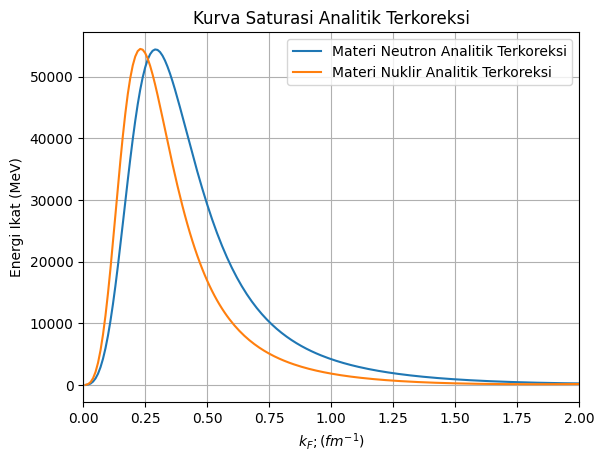

In [ ]:
plt.plot(kf_list, BE_list_a[0], label='Materi Neutron Analitik', linestyle='--', color='red')
plt.plot(kf_list, BE_list_a[1], label='Materi Nuklir Analitik', linestyle='-', color='green')
plt.plot(kf_list, BE_list[0], label='Materi Neutron Numerik', linestyle='--', linewidth=4, color='orange')
plt.plot(kf_list, BE_list[1], label='Materi Nuklir Numerik', linestyle='-', linewidth=4, color='cyan')
plt.plot(kf_list, BE_list_at[0], label='Materi Neutron Analitik Terkoreksi', linestyle='--', color='blue')
plt.plot(kf_list, BE_list_at[1], label='Materi Nuklir Analitik Terkoreksi', linestyle='-', color='magenta')
ax = plt.gca()
ax.set_xlim([0, 2.0])
#ax.set_ylim([-20, 25])
plt.title('Kurva Saturasi')
plt.ylabel('Energi Ikat (MeV)')
plt.xlabel('$k_{F}; (fm^{-1})$')
plt.legend()
plt.grid()
plt.show()

plt.plot(kf_list, BE_list_a[0], label='Materi Neutron Analitik')
plt.plot(kf_list, BE_list_a[1], label='Materi Nuklir Analitik')
ax = plt.gca()
ax.set_xlim([0, 2.0])
ax.set_ylim([-20, 25])
plt.title('Kurva Saturasi Analitik')
plt.ylabel('Energi Ikat (MeV)')
plt.xlabel('$k_{F}; (fm^{-1})$')
plt.legend()
plt.grid()
plt.show()

plt.plot(kf_list, BE_list[0], label='Materi Neutron Numerik')
plt.plot(kf_list, BE_list[1], label='Materi Nuklir Numerik')
ax = plt.gca()
ax.set_xlim([0, 2.0])
#ax.set_ylim([-20, 25])
plt.title('Kurva Saturasi Numerik')
plt.ylabel('Energi Ikat (MeV)')
plt.xlabel('$k_{F}; (fm^{-1})$')
plt.legend()
plt.grid()
plt.show()

plt.plot(kf_list, BE_list_at[0], label='Materi Neutron Analitik Terkoreksi')
plt.plot(kf_list, BE_list_at[1], label='Materi Nuklir Analitik Terkoreksi')
ax = plt.gca()
ax.set_xlim([0, 2.0])
#ax.set_ylim([-20, 25])
plt.title('Kurva Saturasi Analitik Terkoreksi')
plt.ylabel('Energi Ikat (MeV)')
plt.xlabel('$k_{F}; (fm^{-1})$')
plt.legend()
plt.grid()
plt.show()

# Pressure Plot

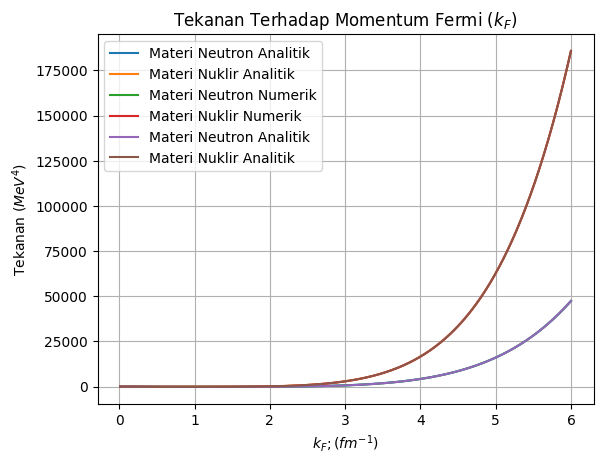

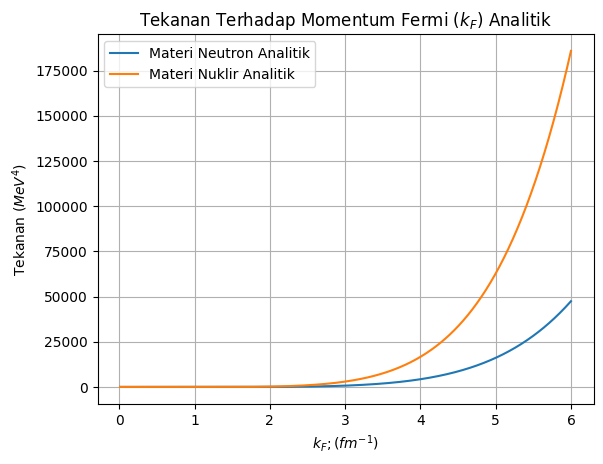

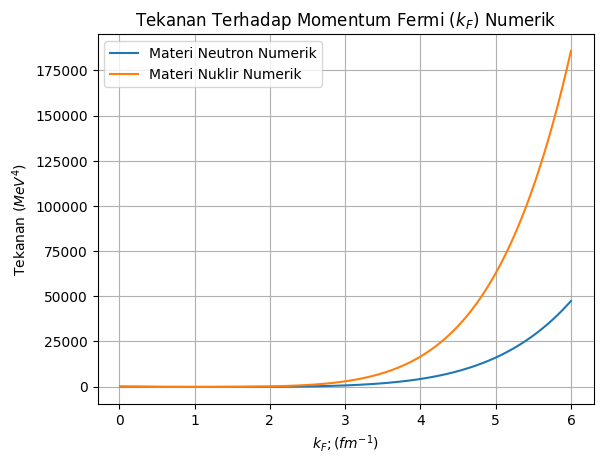

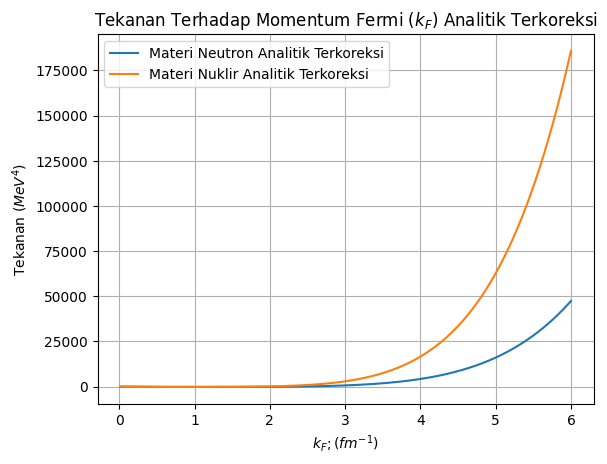

In [ ]:
plt.plot(kf_list, P_list_a[0], label='Materi Neutron Analitik')
plt.plot(kf_list, P_list_a[1], label='Materi Nuklir Analitik')
plt.plot(kf_list, P_list[0], label='Materi Neutron Numerik')
plt.plot(kf_list, P_list[1], label='Materi Nuklir Numerik')
plt.plot(kf_list, P_list_at[0], label='Materi Neutron Analitik')
plt.plot(kf_list, P_list_at[1], label='Materi Nuklir Analitik')
ax = plt.gca()
# ax.set_xlim([0, 4])
# ax.set_ylim([-100, 1e4])
plt.title('Tekanan Terhadap Momentum Fermi $(k_{F})$')
plt.ylabel('Tekanan $(MeV^{4})$')
plt.xlabel('$k_{F}; (fm^{-1})$')
plt.legend()
plt.grid()
plt.show()

plt.plot(kf_list, P_list_a[0], label='Materi Neutron Analitik')
plt.plot(kf_list, P_list_a[1], label='Materi Nuklir Analitik')
ax = plt.gca()
# ax.set_xlim([0, 4])
# ax.set_ylim([-100, 1e4])
plt.title('Tekanan Terhadap Momentum Fermi $(k_{F})$ Analitik')
plt.ylabel('Tekanan $(MeV^{4})$')
plt.xlabel('$k_{F}; (fm^{-1})$')
plt.legend()
plt.grid()
plt.show()

plt.plot(kf_list, P_list[0], label='Materi Neutron Numerik')
plt.plot(kf_list, P_list[1], label='Materi Nuklir Numerik')
ax = plt.gca()
# ax.set_xlim([0, 4])
# ax.set_ylim([-100, 1e4])
plt.title('Tekanan Terhadap Momentum Fermi $(k_{F})$ Numerik')
plt.ylabel('Tekanan $(MeV^{4})$')
plt.xlabel('$k_{F}; (fm^{-1})$')
plt.legend()
plt.grid()
plt.show()

plt.plot(kf_list, P_list_at[0], label='Materi Neutron Analitik Terkoreksi')
plt.plot(kf_list, P_list_at[1], label='Materi Nuklir Analitik Terkoreksi')
ax = plt.gca()
# ax.set_xlim([0, 4])
# ax.set_ylim([-100, 1e4])
plt.title('Tekanan Terhadap Momentum Fermi $(k_{F})$ Analitik Terkoreksi')
plt.ylabel('Tekanan $(MeV^{4})$')
plt.xlabel('$k_{F}; (fm^{-1})$')
plt.legend()
plt.grid()
plt.show()

# Logarithmic Plot

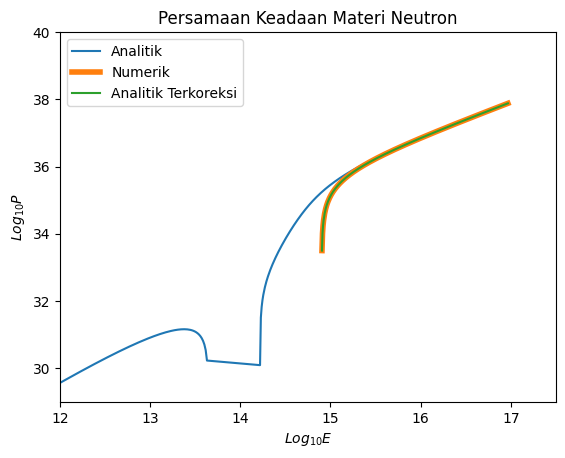

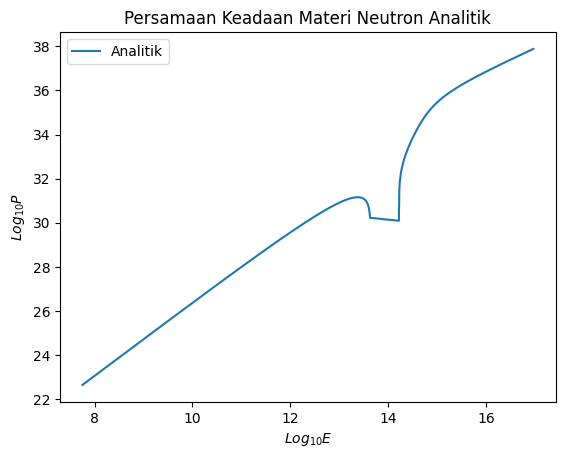

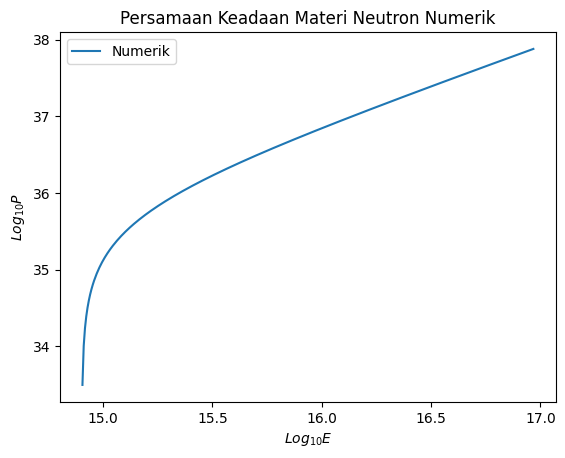

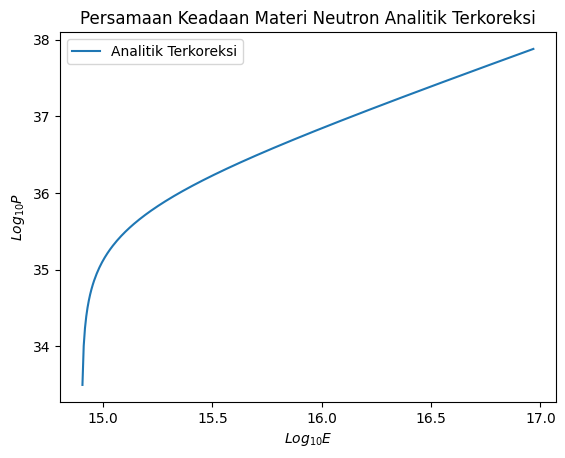

In [ ]:
# P vs E logarithmic graph
plt.plot(logE_list_a[0], logP_list_a[0], label='Analitik')
plt.plot(logE_list[0], logP_list[0], label='Numerik', linewidth=4,)
plt.plot(logE_list_at[0], logP_list_at[0], label='Analitik Terkoreksi')
# plt.plot(P_list_a[0], E_list_a[0], label='$p=\epsilon$')
ax = plt.gca()
ax.set_xlim([12, 17.5])
ax.set_ylim([29, 40])
plt.title('Persamaan Keadaan Materi Neutron')
plt.ylabel('$Log_{10}P$')
plt.xlabel('$Log_{10}E$')
plt.legend()
plt.show()

plt.plot(logE_list_a[0], logP_list_a[0], label='Analitik')
ax = plt.gca()
plt.title('Persamaan Keadaan Materi Neutron Analitik')
plt.ylabel('$Log_{10}P$')
plt.xlabel('$Log_{10}E$')
plt.legend()
plt.show()

plt.plot(logE_list[0], logP_list[0], label='Numerik')
ax = plt.gca()
plt.title('Persamaan Keadaan Materi Neutron Numerik')
plt.ylabel('$Log_{10}P$')
plt.xlabel('$Log_{10}E$')
plt.legend()
plt.show()

plt.plot(logE_list_at[0], logP_list_at[0], label='Analitik Terkoreksi')
ax = plt.gca()
plt.title('Persamaan Keadaan Materi Neutron Analitik Terkoreksi')
plt.ylabel('$Log_{10}P$')
plt.xlabel('$Log_{10}E$')
plt.legend()
plt.show()

# Comparison with analytic

In [ ]:
#Analitics
# root finder
def secant(f, x0):
    flag = 1
    h = 0.01
    x1 = x0
    f1 = f(x1)
    x2 = x1 + x1*h
    f2 = f(x2)
    for i in range(1000):
        x = x2 - f2*(x2-x1)/(f2-f1)
        if abs(x-x2)<0.001:
            flag = 0
            break
        x1 = x2
        if(x<0):
            x = 0.1
        x2 = x
        f1 = f(x1)
        f2 = f(x2)
    if abs(flag-1)<0.001:
        print('No Convergence')
        x = 0
    return x

# parameter set
# initialise various values
gamma_list = [2,4]
hc = 197.3269804
pi = np.pi
M = 939
M2 = M**2
ms = 500
mv = 782
cs2 = 267.1   # cs^2 = gs^2 * (M/ms)^2
cv2 = 195.9
ms2 = ms**2
mv2 = mv**2
gs2 = cs2*ms2/M2
gv2 = cv2*mv2/M2

kf_list_a = [x/100 for x in range(1,601)]   # kf from 0 to 6

Meff_list_a = []
E_list_a = []
logE_list_a = []
BE_list_a = []
P_list_a = []
logP_list_a = []

# eos evaluation
for gamma in gamma_list:
    Meff_list_a.append([])
    E_list_a.append([])
    logE_list_a.append([])
    BE_list_a.append([])
    P_list_a.append([])
    logP_list_a.append([])

    for kf in kf_list_a:
        kf = hc*kf
        rhoB = gamma*(kf**3)/(6*(pi**2))
        def f(x):
            efef=(kf**2+x**2)**0.5
            s = x - M + gs2*gamma*x**2/(8.0*pi**2*ms**2)*(kf*efef-x**2*np.log((kf+efef)/x))
            return s
        Meff0 = M
        Meff = secant(f, Meff0)

        if abs(Meff-0)<0.001 or Meff<0:
            Meff = Meff0
        Meff_list_a[-1].append(Meff/M)
        efef=(kf**2+Meff**2)**0.5

        E=cv2*(rhoB**2)/(2*(M**2)) + (M**2)*((M-Meff)**2)/(2*cs2)+gamma*(kf*efef*(kf**2+efef**2)-(Meff**4)*np.log((kf+efef)/Meff))/((4*pi)**2)
        P=cv2*(rhoB**2)/(2*(M**2)) - (M**2)*((M-Meff)**2)/(2*cs2)+gamma*(kf*efef*(2*kf**2-3*Meff**2)+3*(Meff**4)*np.log((kf+efef)/Meff))/(3*(4*pi)**2)

        E_list_a[-1].append(E/(hc**3))
        BE_list_a[-1].append(E/rhoB - M)
        P_list_a[-1].append(P/(hc**3))

        if (P>0):
           logE_list[-1].append(np.log10(E*1.782661921e12/(hc**3)))
           logP_list[-1].append(np.log10(P*1.602176634e33/(hc**3)))

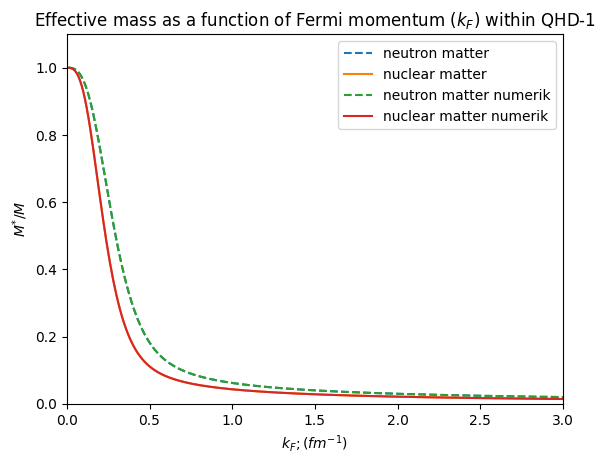

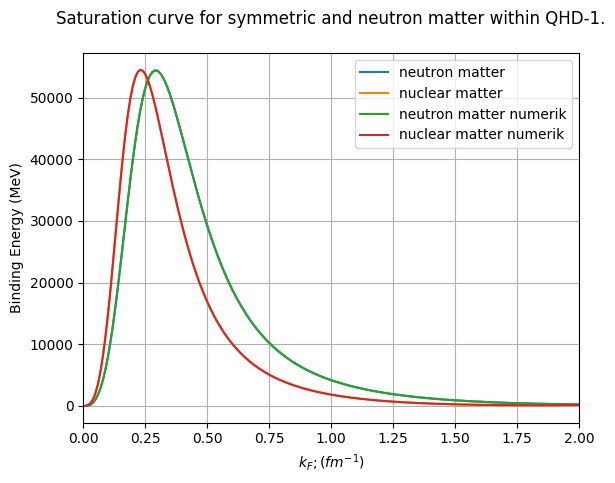

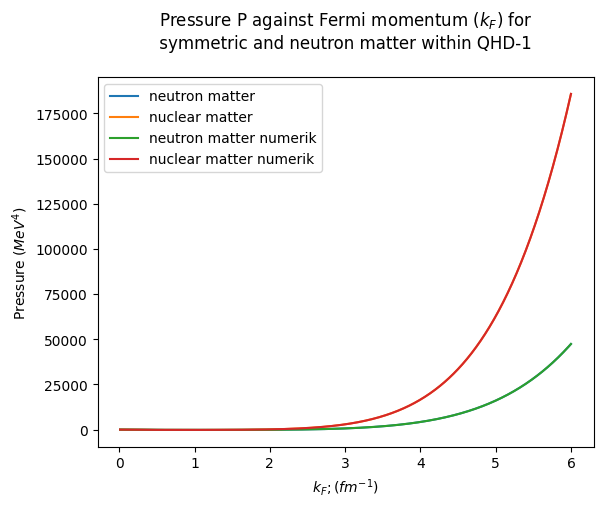

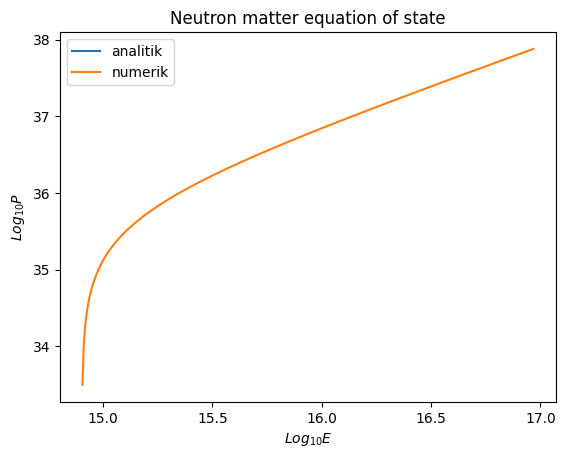

In [ ]:
# Plotting results
plt.plot(kf_list_a, Meff_list_a[0], label='neutron matter', linestyle='--')
plt.plot(kf_list_a, Meff_list_a[1], label='nuclear matter')
plt.plot(kf_list, Meff_list[0], label='neutron matter numerik', linestyle='--')
plt.plot(kf_list, Meff_list[1], label='nuclear matter numerik')
ax = plt.gca()
ax.set_xlim([0, 3.0])
ax.set_ylim([0, 1.1])
plt.title('Effective mass as a function of Fermi momentum $(k_{F})$ within QHD-1')
plt.ylabel('$M^{*}/M$')
plt.xlabel('$k_{F}; (fm^{-1})$')
plt.xlim(0, 3)
plt.legend()
plt.show()

plt.plot(kf_list_a, BE_list_a[0], label='neutron matter')
plt.plot(kf_list_a, BE_list_a[1], label='nuclear matter')
plt.plot(kf_list, BE_list[0], label='neutron matter numerik')
plt.plot(kf_list, BE_list[1], label='nuclear matter numerik')
ax = plt.gca()
ax.set_xlim([0, 2.0])
#ax.set_ylim([-20, 25])
plt.title('Saturation curve for symmetric and neutron matter within QHD-1.\n')
plt.ylabel('Binding Energy (MeV)')
plt.xlabel('$k_{F}; (fm^{-1})$')
plt.legend()
plt.grid()
plt.show()

plt.plot(kf_list_a, P_list_a[0], label='neutron matter')
plt.plot(kf_list_a, P_list_a[1], label='nuclear matter')
plt.plot(kf_list, P_list[0], label='neutron matter numerik')
plt.plot(kf_list, P_list[1], label='nuclear matter numerik')
ax = plt.gca()
# ax.set_xlim([0, 4])
# ax.set_ylim([-100, 1e4])
plt.title('Pressure P against Fermi momentum $(k_{F})$ for \n symmetric and neutron matter within QHD-1 \n')
plt.ylabel('Pressure $(MeV^{4})$')
plt.xlabel('$k_{F}; (fm^{-1})$')
plt.legend()
plt.show()

# P vs E logarithmic graph
plt.plot(logE_list_a[0], logP_list_a[0], label='analitik')
plt.plot(logE_list[0], logP_list[0], label='numerik')
ax = plt.gca()
plt.title('Neutron matter equation of state')
plt.ylabel('$Log_{10}P$')
plt.xlabel('$Log_{10}E$')
plt.legend()
plt.show()


In [ ]:
# Memilih beberapa nilai Meff dan kf untuk diuji
test_kf_values = [100, 200, 300]  # dalam MeV
test_Meff_values = [800, 850, 900]  # dalam MeV

for Meff in test_Meff_values:
    for kf in test_kf_values:
        # Integral numerik
        integral_numerik = kuad_meson(0, kf, Meff)
        # Integral analitik
        efef = np.sqrt(kf**2 + Meff**2)
        integral_analitik = Meff/2*(kf * efef - Meff**2 * np.log((kf + efef) / Meff))
        # Perbandingan
        print(f"Meff = {Meff}, kf = {kf}")
        print(f"Integral Numerik = {integral_numerik}")
        print(f"Integral Analitik = {integral_analitik}")
        print(f"Perbedaan = {abs(integral_numerik - integral_analitik)}\n")


Notes:

There is a discrepancy between the results obtained from the reference journal Serot and Walecka (1986) for effective mass evaluation:

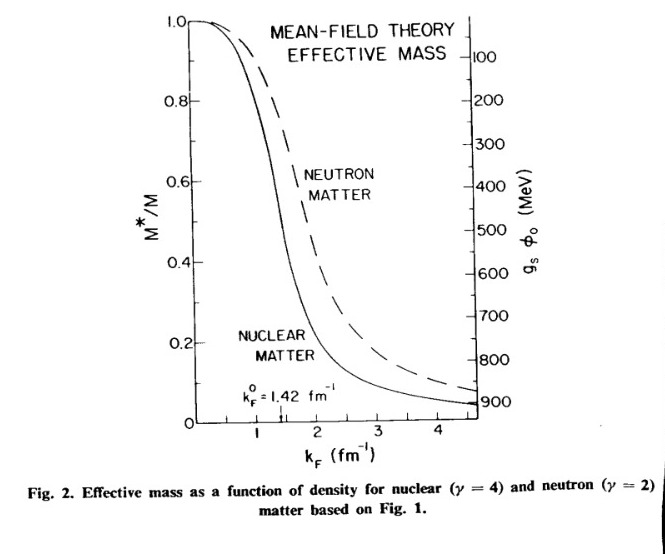

The difference lies in the integral result. Where in the journal, the integral for the effective mass/meson fields result is
\begin{equation}
    \int^{k_F}_0 dk \frac{k^2 m^*}{\sqrt{k^2+m^*}} = \left[ k_F (k_F^2+m^*)^{1/2}-m^{*2} \ln\left(\frac{k_F+(k_F^2+m^{*2})^{1/2}}{m^*}\right) \right]
\end{equation}

But this integral should lack the leading variable, $m^*/2$, so the modified analytic solution equation that yields the same result as the numerical evaluation is

\begin{equation}
    \int^{k_F}_0 dk \frac{k^2 m^*}{\sqrt{k^2+m^*}} = \frac{m^*}{2}\left[ k_F (k_F^2+m^*)^{1/2}-m^{*2} \ln\left(\frac{k_F+(k_F^2+m^{*2})^{1/2}}{m^*}\right) \right]
\end{equation}

With that equation, the same plot is obtained between analytical and numerical evaluation.
